In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from modules.LDS import Kalman_EM
from modules.WF_sim import *

from pathlib import Path

# WF simulation

A is not provide! A_demo is used.


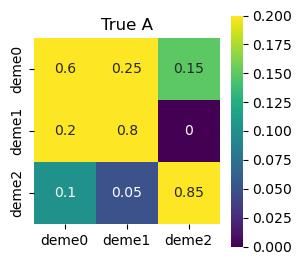

True Neff =  [2000, 2000, 2000]
True measurement noise overdispersion =  [1, 1, 1]


In [220]:
ND = 3 # the number of demes 
T=10 # the number of timepoints
Csn =[1]*ND # strength of measurement noise overdispersion
Npop = [2000]*ND # effective population size
totcounts=np.array([[2000,3000,1500]]*T).T # number of sequences sampled from each region
A,counts,B=WF_sim(Npop,totcounts, Csn, ND, T, A=None,Ntraj=20)

demes=['deme'+str(i) for i in range(ND)]

plt.figure(figsize=[3,3])
sns.heatmap(A,cmap='viridis',vmax=0.2,annot=True,xticklabels=demes, yticklabels=demes,square=True)
plt.title('True A')
plt.show()

print("True Neff = ", Npop)
print("True measurement noise overdispersion = ", Csn )

## HMM-EM

T= Number of timepoints

NA= Number of alleles

ND = Number of demes

* INPUT
    * counts: spatio-temporal data of allele (or lineage) counts, with shape (ND, NA ,T).
    * totcounts: spatio-temporal data of total number of sampled sequences, with shape (ND, T).
* OUTPUT
    * lnLH_record: Record of log likelihood across EM cycles,
    * A_EM: Inferred A.
    * Ne_EM: Inferred effective population size.
    * A_LS: Least squares solution (noises ignored).
    * Csn_EM: Inferred measurment noise overdispersion.

terminate at step=8, DA=0.00064, ratioDNe=0.02162, ratioDCsn=0.00081


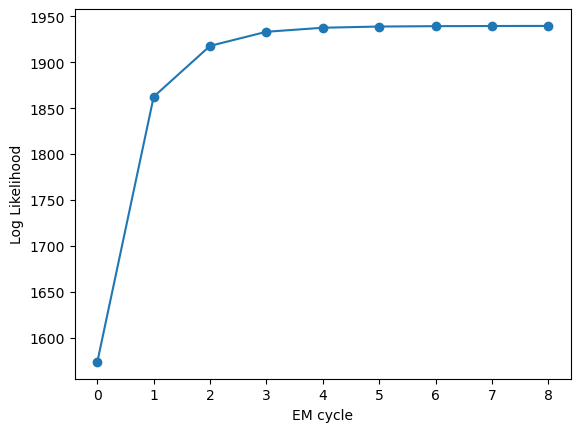

In [139]:
lnLH_record, A_EM, Ne_EM, A_LS,Csn_EM=Kalman_EM(counts=counts+1, 
                                             counts_deme=totcounts, 
                                             em_step_max=100,terminate_th=0.001, 
                                             frac=0.5,noisemode=2,Qprintstep=False)

plt.plot(lnLH_record,marker='o')
plt.xlabel('EM cycle')
plt.ylabel('Log Likelihood')
plt.show()

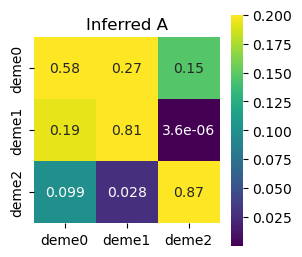

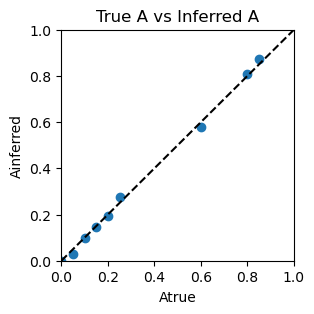

Inferred Neff =  [2471.05829509 1790.72122864 2041.63232304]
Inferred measurement noise overdispersion =  [1.        1.2574275 1.       ]


In [140]:
plt.figure(figsize=[3,3])
sns.heatmap(A_EM,cmap='viridis',vmax=0.2,annot=True,xticklabels=demes, yticklabels=demes,square=True)
plt.title('Inferred A')
plt.show()

plt.figure(figsize=(3,3))
plt.scatter(A.flatten(),A_EM.flatten())
plt.plot([0,1],'--',color='k')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Atrue')
plt.ylabel('Ainferred')
plt.title('True A vs Inferred A')
plt.show()

print("Inferred Neff = ", Ne_EM)
print("Inferred measurement noise overdispersion = ", Csn_EM)

## HMM-MCMC (C++)

T= Number of timepoints

NA= Number of alleles

ND = Number of demes

* INPUT
    * counts: spatio-temporal data of allele (or lineage) counts. CSV file with shape (TxNA, ND). The frequencies of the i-th lineage at time t appears at the (i-1)*T + t -th row.
    * totcounts: spatio-temporal data of total number of sampled sequences. CSV file with shape (T, ND).
* OUTPUT
    * A_MCMC: Posterior distribution of A.
    * Ne_MCMC: Posterior distribution of effective population size.
    * Csn_MCMC: Posterior distribution of measurment noise overdispersion.
from modules.HMMtools import *

In [266]:
dir_IO ='demo'
filename='WFsim'

In [268]:
MCMC_dir = 'HMM_MCMC/'

inpath=MCMC_dir+'input/'#+dir_IO+'/'
Path(inpath).mkdir(parents=True, exist_ok=True)

ND,Nmut,tmax  = counts.shape

counts_  = counts.transpose()
shapelst=list(counts_.shape)

aux=np.vstack([counts_[:, i, :] for i in range(Nmut)])

np.savetxt(inpath+'counts_'+filename+'.csv', aux, fmt="%d", delimiter=",")
np.savetxt(inpath+'totcounts_'+filename+'.csv', totcounts.transpose(), fmt="%d", delimiter=",")
np.savetxt(inpath+'shape_'+filename+'.csv', shapelst, fmt="%d", delimiter=",") #  shapelist = #timepoints, #trajectories, #demes
    

In [ ]:
import os
import subprocess
try:
    os.chdir("HMM_MCMC/")
    subprocess.run(["./NI_MCMC", "-f", "WFsim","-m", "50000", "-n","2"])  # May raise an error
finally:
    os.chdir('..')



Filename: WFsim
0: IF 0, C is inferred:
reading input/shape_WFsim.csv
T=10, Nlin=20, Ndeme=3
noisemode=2
nonDB
reading input/counts_WFsim.csv
reading input/totcounts_WFsim.csv
Counts
@0 :2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 
@1 :3000 3000 3000 3000 3000 3000 3000 3000 3000 3000 
@2 :1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 

Aold
 0.592348  0.254599  0.153052
 0.254599   0.73025 0.0151508
 0.153052 0.0151508  0.831797
logLH_old1898.68479180
Step = 2500,  acc = 8.00000000%, lnLH=1903.443074, DBbroken = 0.04
Step = 5000,  acc = 7.00%, lnLH=1904.718594, DBbroken = 0.06
Step = 7500,  acc = 7.00%, lnLH=1905.444416, DBbroken = 0.07
Step = 10000,  acc = 7.00%, lnLH=1906.888214, DBbroken = 0.02
Step = 12500,  acc = 7.00%, lnLH=1904.725886, DBbroken = 0.05
Step = 15000,  acc = 7.00%, lnLH=1905.150997, DBbroken = 0.08
Step = 17500,  acc = 8.00%, lnLH=1906.891480, DBbroken = 0.00
Step = 20000,  acc = 7.00%, lnLH=1897.465795, DBbroken = 0.03
Step = 22500,  acc = 6.00%, lnLH=1

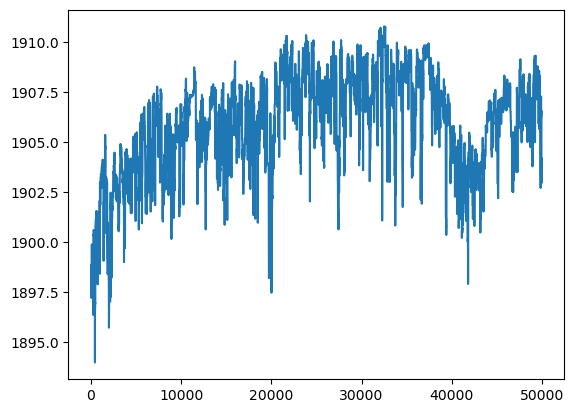

In [269]:
A_mcmc=np.loadtxt(MCMC_dir+'output/A_'+filename+'.csv',delimiter=',')
Ne_mcmc=np.loadtxt(MCMC_dir+'output/Ne_'+filename+'.csv',delimiter=',')
C_mcmc=np.loadtxt(MCMC_dir+'output/C_'+filename+'.csv',delimiter=',')
logLH_mcmc=np.loadtxt(MCMC_dir+'output/logLH_'+filename+'.csv',delimiter=',')

A_mcmc=np.array([ i.reshape((Ne_mcmc.shape[1],Ne_mcmc.shape[1])) for i in A_mcmc])

plt.plot(logLH_mcmc[:,0],logLH_mcmc[:,1])
plt.show()

In [270]:
# Burn-in
burn_in=int(0.5*len(A_mcmc))
A_mcmc = A_mcmc[burn_in:]
Ne_mcmc= Ne_mcmc[burn_in:]
C_mcmc = C_mcmc[burn_in:]


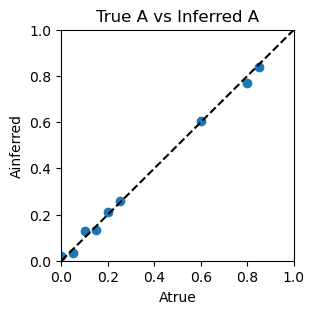

Inferred Neff =  [1827.321278 1485.65646  1727.911692]
Inferred measurement noise overdispersion =  [1.29273413 1.18138973 1.17137445]


In [271]:

plt.figure(figsize=(3,3))
plt.scatter(A.flatten(),np.mean(A_mcmc,axis=0).flatten())
plt.plot([0,1],'--',color='k')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Atrue')
plt.ylabel('Ainferred')
plt.title('True A vs Inferred A')
plt.show()

print("Inferred Neff = ", np.mean(Ne_mcmc,axis=0))
print("Inferred measurement noise overdispersion = ", np.mean(C_mcmc,axis=0))